In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read data and format

In [2]:
# Read the CSV file
df = pd.read_csv('yield_data.csv', skiprows=4)

df.columns = df.iloc[0]

# Set the index to the date
df.set_index('Dates', inplace=True)

df = df.drop(df.index[0])


# Convert the data to float
df = df.astype(float)

# only keep last 150 rows
df = df.tail(150)
df = df/100
df

,CMTUSD1Y Index,CMTUSD2Y Index,CMTUSD3Y Index,CMTUSD4Y Index,CMTUSD5Y Index,CMTUSD6Y Index,CMTUSD7Y Index,CMTUSD8Y Index,CMTUSD9Y Index,CMTUSD10 Index,CMTUSD15 Index,CMTUSD20 Index,CMTUSD30 Index
Dates,,,,,,,,,,,,,
8/8/2023,0.05292,0.04760,0.04447,0.04288,0.04166,0.04177,0.04132,0.04073,0.04101,0.04096,0.04189,0.04427,0.04271
8/9/2023,0.05278,0.04745,0.04406,0.04238,0.04112,0.04121,0.04072,0.04009,0.04034,0.04030,0.04119,0.04365,0.04209
8/10/2023,0.05346,0.04801,0.04442,0.04274,0.04139,0.04133,0.04079,0.04007,0.04025,0.04018,0.04093,0.04335,0.04173
8/11/2023,0.05324,0.04834,0.04512,0.04358,0.04233,0.04232,0.04180,0.04106,0.04132,0.04109,0.04192,0.04425,0.04253
8/14/2023,0.05338,0.04885,0.04577,0.04425,0.04303,0.04299,0.04247,0.04160,0.04180,0.04155,0.04227,0.04446,0.04263
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/27/2024,0.05028,0.04705,0.04487,0.04392,0.04314,0.04326,0.04314,0.04310,0.04304,0.04283,0.04349,0.04531,0.04396
2/28/2024,0.05018,0.04694,0.04484,0.04402,0.04313,0.04339,0.04331,0.04327,0.04324,0.04303,0.04385,0.04560,0.04427
2/29/2024,0.04999,0.04638,0.04433,0.04348,0.04260,0.04295,0.04285,0.04288,0.04287,0.04265,0.04360,0.04538,0.04405


In [3]:
df_diff = df.diff().dropna()

# standardize to prevent over/under weighting
mean_diff = df_diff.mean()
std_diff = df_diff.std()
df_standardized = (df_diff - mean_diff) / std_diff

# computation of eigenvalues and eigenvectors
covariance_matrix = np.cov(df_standardized, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# sort
idx = eigenvalues.argsort()[::-1]   
eigenvalues_sorted = eigenvalues[idx]
eigenvectors_sorted = eigenvectors[:,idx]


# variance ratios
explained_variance_ratio = eigenvalues_sorted / eigenvalues_sorted.sum()

print("Explained Variance Ratio")
for i, variance in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {variance:.4f} or {variance * 100:.2f}% of total variance")
    
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print("\nCumulative Variance Explained")
for i, cum_var in enumerate(cumulative_variance_ratio):
    print(f"PC1 to PC{i+1}: {cum_var:.4f} or {cum_var * 100:.2f}% of total variance")


Explained Variance Ratio
PC1: 0.8983 or 89.83% of total variance
PC2: 0.0888 or 8.88% of total variance
PC3: 0.0088 or 0.88% of total variance
PC4: 0.0024 or 0.24% of total variance
PC5: 0.0005 or 0.05% of total variance
PC6: 0.0003 or 0.03% of total variance
PC7: 0.0003 or 0.03% of total variance
PC8: 0.0002 or 0.02% of total variance
PC9: 0.0001 or 0.01% of total variance
PC10: 0.0001 or 0.01% of total variance
PC11: 0.0001 or 0.01% of total variance
PC12: 0.0000 or 0.00% of total variance
PC13: 0.0000 or 0.00% of total variance

Cumulative Variance Explained
PC1 to PC1: 0.8983 or 89.83% of total variance
PC1 to PC2: 0.9871 or 98.71% of total variance
PC1 to PC3: 0.9958 or 99.58% of total variance
PC1 to PC4: 0.9983 or 99.83% of total variance
PC1 to PC5: 0.9988 or 99.88% of total variance
PC1 to PC6: 0.9991 or 99.91% of total variance
PC1 to PC7: 0.9994 or 99.94% of total variance
PC1 to PC8: 0.9996 or 99.96% of total variance
PC1 to PC9: 0.9997 or 99.97% of total variance
PC1 to PC

In [4]:
n_components = 4  # number of components to keep
selected_vectors = eigenvectors_sorted[:, :n_components]

# projection
pca_result = np.dot(df_standardized, selected_vectors)
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(n_components)])


# pca df 
# this represents the principal components value on a daily basis and would be used for reconstruction
pca_df

,PC1,PC2,PC3,PC4
0,2.748349,-0.779761,0.045148,-0.218746
1,-0.585535,-2.011617,0.494795,0.159574
2,-4.102982,1.273580,-0.993476,0.117836
3,-2.489040,-0.493668,-0.659921,0.203524
4,-2.379206,-0.703518,-0.368801,-0.260403
...,...,...,...,...
144,-1.583405,-0.395232,0.282825,0.130591
145,-0.675335,0.722183,0.062892,-0.008285
146,2.037702,0.379539,0.341515,0.088579
147,0.882883,-0.214552,-0.036240,0.228201


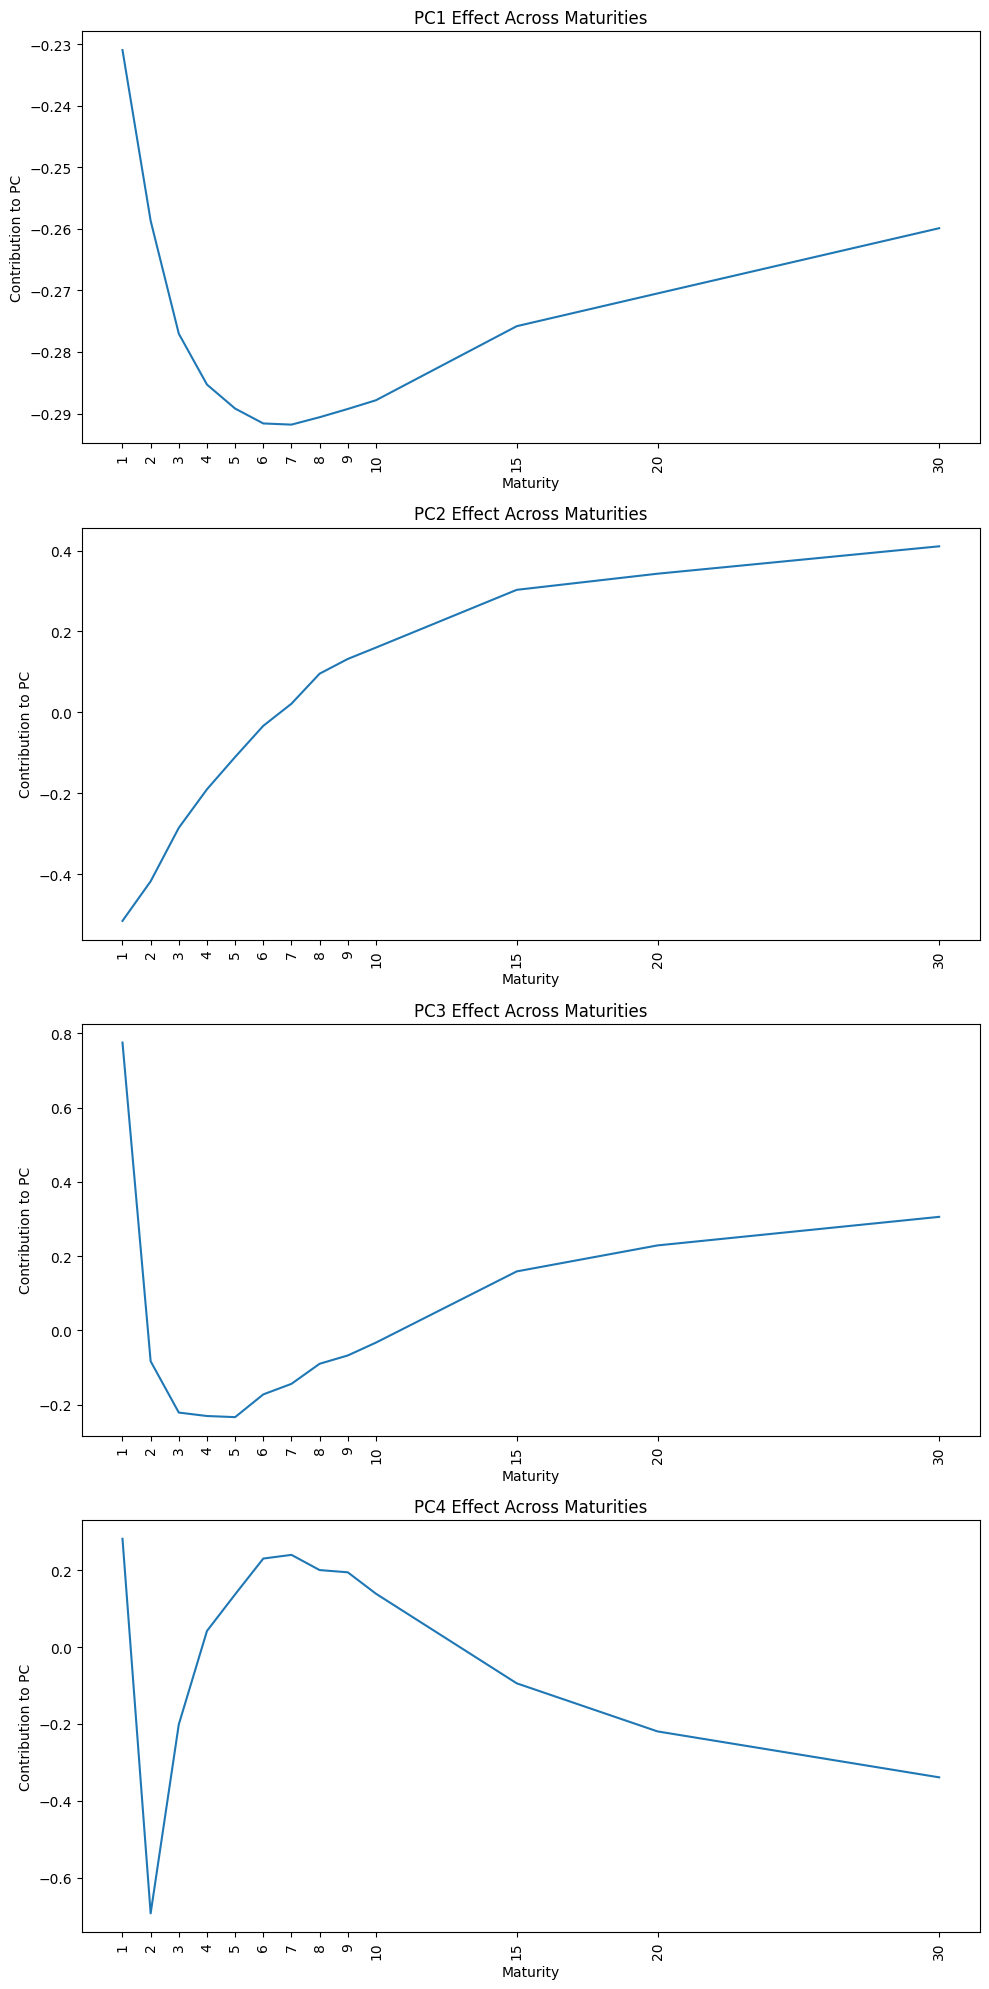

In [5]:
maturities = [1,2,3,4,5,6,7,8,9,10,15,20,30]

fig, axs = plt.subplots(n_components, figsize=(10, 20))
for i in range(n_components):
    axs[i].plot(maturities, selected_vectors[:, i])  # Pass maturities as x values
    axs[i].set_title(f'PC{i+1} Effect Across Maturities')
    axs[i].set_xlabel('Maturity')
    axs[i].set_ylabel('Contribution to PC')
    # Set x-ticks to the correct maturities
    axs[i].set_xticks(maturities)  # Set x-ticks to match the maturities list
    axs[i].set_xticklabels(maturities, rotation=90)  # Set x-tick labels to match the maturities list
plt.tight_layout()
plt.show()

### Possible Explainations:
PCA 1: Level Factor, the early drop shows a strong decrease of short term rates

PCA 2: Slope Factor, indicates steepening/flattening, a positive PCA2 represents a steepining

PCA 3: Curvature Factor, shows a significant positive effect on the first maturity, possibly representing convexity

PCA 4: Specific Movenents, the irregular shape could indicate this is capturing an economic event or an anomaly impacting the yield curve

### Reconstruction

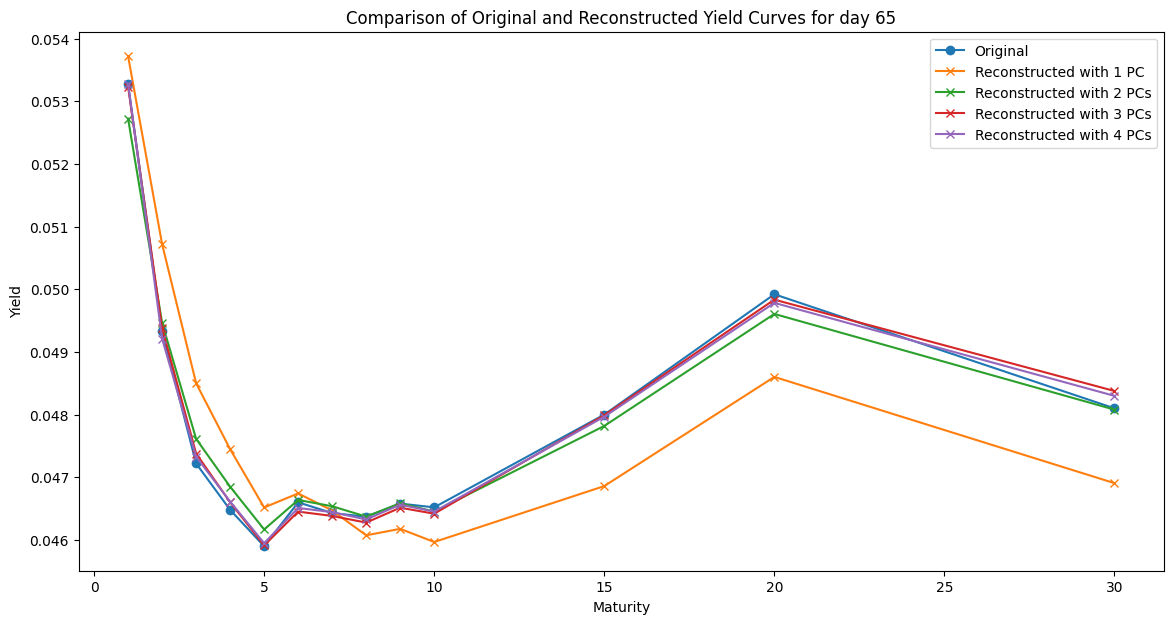

In [12]:
def reconstruct_data(n_components, pca_scores, eigenvectors, mean_diff, std_diff):
    # select the appropriate eigenvectors
    selected_vectors = eigenvectors[:, :n_components]
    # project the PCA scores back to the original space
    reconstructed_standardized = np.dot(pca_scores, selected_vectors.T)
    # reverse the standardization process
    reconstructed = (reconstructed_standardized * std_diff.values.reshape(1, -1)) + mean_diff.values.reshape(1, -1)
    return reconstructed

# perform reconstruction with different numbers of components
reconstructed_1_pc = reconstruct_data(1, pca_df[['PC1']].values, eigenvectors_sorted, mean_diff, std_diff)
reconstructed_2_pcs = reconstruct_data(2, pca_df[['PC1', 'PC2']].values, eigenvectors_sorted, mean_diff, std_diff)
reconstructed_3_pcs = reconstruct_data(3, pca_df[['PC1', 'PC2', 'PC3']].values, eigenvectors_sorted, mean_diff, std_diff)
reconstructed_4_pcs = reconstruct_data(4, pca_df.values, eigenvectors_sorted, mean_diff, std_diff)

reconstructed_1_pc_df = pd.DataFrame(reconstructed_1_pc, columns=df_diff.columns, index=df_diff.index)
reconstructed_2_pcs_df = pd.DataFrame(reconstructed_2_pcs, columns=df_diff.columns, index=df_diff.index)
reconstructed_3_pcs_df = pd.DataFrame(reconstructed_3_pcs, columns=df_diff.columns, index=df_diff.index)
reconstructed_4_pcs_df = pd.DataFrame(reconstructed_4_pcs, columns=df_diff.columns, index=df_diff.index)


# choose what day to reconstruct
reconstructed_day = 65

original_data = df.iloc[reconstructed_day].values  # Original yield curve for the chosen day

def reconstruct_yield_curve_from_diff(reconstructed_diff, base_yield_curve):
    reconstructed_yield_curve = np.zeros_like(reconstructed_diff)
    reconstructed_yield_curve[0] = base_yield_curve
    
    for i in range(1, len(reconstructed_diff)):
        reconstructed_yield_curve[i] = reconstructed_yield_curve[i - 1] + reconstructed_diff[i-1]
    
    return reconstructed_yield_curve


# choose the first day of the differences as the base for reconstruction
base_yield_curve = df.iloc[-len(df_diff)-1]  

# reconstruct the yield curves
reconstructed_1_pc_yield_curve = reconstruct_yield_curve_from_diff(reconstructed_1_pc_df.values, base_yield_curve.values)
reconstructed_2_pcs_yield_curve = reconstruct_yield_curve_from_diff(reconstructed_2_pcs_df.values, base_yield_curve.values)
reconstructed_3_pcs_yield_curve = reconstruct_yield_curve_from_diff(reconstructed_3_pcs_df.values, base_yield_curve.values)
reconstructed_4_pcs_yield_curve = reconstruct_yield_curve_from_diff(reconstructed_4_pcs_df.values, base_yield_curve.values)

# plot
plt.figure(figsize=(14, 7))

plt.plot(maturities, original_data, label='Original', marker='o')

plt.plot(maturities, reconstructed_1_pc_yield_curve[reconstructed_day], label='Reconstructed with 1 PC', marker='x')
plt.plot(maturities, reconstructed_2_pcs_yield_curve[reconstructed_day], label='Reconstructed with 2 PCs', marker='x')
plt.plot(maturities, reconstructed_3_pcs_yield_curve[reconstructed_day], label='Reconstructed with 3 PCs', marker='x')
plt.plot(maturities, reconstructed_4_pcs_yield_curve[reconstructed_day], label='Reconstructed with 4 PCs', marker='x')

plt.title(f'Comparison of Original and Reconstructed Yield Curves for day {reconstructed_day}')
plt.xlabel('Maturity')
plt.ylabel('Yield')
plt.legend()

plt.show()
